### Imarticus Skillzilla Hackathon

### Predict number of Views in an Youtube video

Aim: To predict number of views in an Youtube video based on its likes, dislikes, comment, and tags in the video.

We begin by importing our libraries

1. We will be using Numpy for all calculation,
2. Pandas for data-management
3. OS for directory control
4. Seaborn Matplotlib for visual representation of data
5. Sklearns Random Forest, KNN, RidgeCV, LR for model building
6. Sklearns GridSearchCV for hyperparameter tunning
7. Stacking Regressor for Ensembled Model building.

In [70]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
os.chdir("D:/Docs/Education/Data Science/Python projects/Analytics Vidya and Kaggle/IM Views Pred")

### Reading the raw data input

Our dataset came with a designated train and test sets.


In [3]:
imptrain=pd.read_csv("train.csv")
imptest=pd.read_csv("test.csv")
imptrain

,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,...,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 19,Unnamed: 20
0,HDR9SQc79,2017-11-13,2017-11-20,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,...,6,,falSE,falSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,2017-11-13,2017-11-20,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,...,1,116266,TrUe,FaLSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,2017-11-12,2017-11-20,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.0,...,3,257850,true,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,2017-11-13,2017-11-20,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.0,...,5,263939,true,True,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,2017-11-12,2017-11-19,224,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.0,...,7,268085,True,TRUE,0,0,True,4835374,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,OKR48DOE67,2018-01-27,2018-02-01,20,EA SPORTS FIFA,3150213.0,FIFA 18 - FUT Champions Cup Barcelona - Day 1,fifa|fifa ultimate team|fut|fifa pack opening|...,Day 1 of the FUT Champions Cup Barcelona featu...,7.0,...,5,,FALSE,falSE,9734,5912,False,747960,NaN,NaN
3194,QJK69DS?91,2018-01-26,2018-02-01,10,JackWhiteVEVO,261596.0,Jack White - Corporation (Audio),Alternative|Corporation|Jack White|Third Man R...,“Corporation” by Jack White from the forthcomi...,7.0,...,6,,falSE,False,16006,12019,True,200410,NaN,NaN
3195,VHF51NVr11,2018-01-26,2018-02-01,10,JamesBlakeVEVO,28321.0,James Blake - If The Car Beside You Moves Ahea...,James|Blake|If|The|Car|Beside|You|Moves|Ahead|...,If the car beside you moves ahead \nAs much as...,11.0,...,4,,FALSE,True,0,0,True,244022,NaN,NaN
3196,XHU22OAJ39,2018-01-26,2018-01-28,26,Refinery29,890739.0,Lucie Fink Trains Like A Professional Gymnast ...,refinery29|refinery 29|r29|r29 video|refinery2...,"On this episode of Lucie For Hire, our host Lu...",11.0,...,6,250750,TrUe,False,6859,1247,True,907340,NaN,NaN


We will drop the 'Id" column along with "description" and other non-significant variables

In [4]:
imptrain.drop(["Video_id", "Unnamed: 19", "Unnamed: 20", "description"], inplace=True, axis=1)

We will drop similar columns from test also and add "views" to maintain the shape of both train and test. This is done so that pre-processing can be applied to both the train and test easily.

In [5]:
imptrain["Source"]="Train"
imptest["Source"]="Test"
viewId=imptest["Video_id"]   #keeping a copy of ViewIDs
imptest.drop(["Video_id","description"], axis=1, inplace=True)
imptest["views"]=0 #creating a "Views" column to match the same
fullraw=pd.concat([imptrain, imptest], axis=0)  #combining both train and test
print(fullraw.shape)

(4533, 18)


In [6]:
fullraw #contains both train and test

,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Source
0,2017-11-13,2017-11-20,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,6.0,21,6,,falSE,falSE,13342,6089,False,1978978,Train
1,2017-11-13,2017-11-20,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,1.0,23,1,116266,TrUe,FaLSE,5761,3044,False,1487870,Train
2,2017-11-12,2017-11-20,23,Rudy Mancuso,4191209.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,10.0,22,3,257850,true,TRUE,0,0,True,1502102,Train
3,2017-11-13,2017-11-20,24,Good Mythical Morning,13186408.0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,12.0,17,5,263939,true,True,0,0,True,3519302,Train
4,2017-11-12,2017-11-19,224,nigahiga,20563106.0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,11.0,15,7,268085,True,TRUE,0,0,True,4835374,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2018-03-04,2018-03-05,27,The King of Random,9133669.0,Watch what Whipped Cream Does in a Vacuum Chamber,whipped cream|meringue|vacuum chamber|whipped|...,9.0,10,1,,False,False,18016,13995,True,0,Test
1331,2018-03-04,2018-03-05,24,Saturday Night Live,5292034.0,Cut for Time: Star Warriors - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,3.0,8,1,94868,True,True,0,0,True,0,Test
1332,2018-03-04,2018-03-05,24,HellthyJunkFood,1568812.0,DIY TACO PIZZA 🌮🍕,taco pizza|diy taco pizza|taco pizza recipe|ta...,5.0,22,1,241644,True,False,7795,6940,True,0,Test
1333,2018-03-04,2018-03-05,27,The Infographics Show,1607518.0,What Is Stone Man Syndrome?,stone man|stone man syndrome|fop|fibrodysplasi...,7.0,15,2,,False,False,11795,10139,True,0,Test


 ### Missing value imputation and Data type corrections

In [7]:
fullraw.dtypes

publish_date              object
trending_date             object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Source                    object
dtype: object

We notice that number of likes, dislikes, views etc should be numeric, yet they were encoded as "objects" variables which needs to be corrected.
One method is, to convert them to "numeric" or sue "One-hot encode". Approching via the Onehot encode method is not feasible due to resource management issues and to maintain code quality

In [8]:
fullraw.replace(' ', np.nan, inplace=True)
fullraw["likes"] = pd.to_numeric(fullraw["likes"], errors='coerce')
fullraw["views"] = pd.to_numeric(fullraw["views"], errors='coerce')
fullraw["dislike"] = pd.to_numeric(fullraw["dislike"], errors='coerce')
fullraw["Tag_count"] = pd.to_numeric(fullraw["Tag_count"], errors='coerce')
fullraw["comment_count"] = pd.to_numeric(fullraw["comment_count"], errors='coerce')
fullraw["Tag_count"] = pd.to_numeric(fullraw["Tag_count"], errors='coerce')
fullraw["Trend_day_count"] = pd.to_numeric(fullraw["Trend_day_count"], errors='coerce')
fullraw["Trend_tag_count"] = pd.to_numeric(fullraw["Trend_tag_count"], errors='coerce')
fullraw["category_id"] = pd.to_numeric(fullraw["category_id"], errors='coerce')

In [9]:
fullraw.dtypes

publish_date              object
trending_date             object
category_id              float64
channel_title             object
subscriber               float64
title                     object
tags                      object
Trend_day_count          float64
Tag_count                float64
Trend_tag_count          float64
comment_count            float64
comment_disabled          object
like dislike disabled     object
likes                    float64
dislike                  float64
tag appered in title      object
views                    float64
Source                    object
dtype: object

In [10]:
fullraw["tags"]

0                                         SHANtell martin
1       last week tonight trump presidency|last week t...
2       racist superman|rudy|mancuso|king|bach|racist|...
3       rhett and link|gmm|good mythical morning|rhett...
4       ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...
                              ...                        
1330    whipped cream|meringue|vacuum chamber|whipped|...
1331    SNL|Saturday Night Live|SNL Season 43|Episode ...
1332    taco pizza|diy taco pizza|taco pizza recipe|ta...
1333    stone man|stone man syndrome|fop|fibrodysplasi...
1334    ufc|222|brian|ortega|octagon|interview|joe|rog...
Name: tags, Length: 4533, dtype: object

**Tags** have lots of string characters which are uncorrelated. 
Tags are separated by **"|"** 
We will be extracting the **First** or the **Primary tag** of the videos. 

This single important tag concept will help in distinguishing each and every video from another and will also not cause memory overload issues.

In [11]:
fullraw["tags2"]=fullraw.tags.str.extract(pat='([A-Za-z]+)\|', expand=False) 
fullraw["tags2"]

0              NaN
1       presidency
2         superman
3             link
4             ryan
           ...    
1330         cream
1331           SNL
1332         pizza
1333           man
1334           ufc
Name: tags2, Length: 4533, dtype: object

In [12]:
fullraw.drop(["tags", "title", "channel_title"], axis=1, inplace=True)

### Let us remove the Null values from the dataset.

Imputing criteria:-

Categorical: First Mode
Continuous: Median

In [13]:
#checking NAs
fullraw.isnull().sum()

publish_date                2
trending_date               2
category_id                 8
subscriber                 31
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1448
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        1
views                       1
Source                      0
tags2                     280
dtype: int64

In [14]:
#imputing missing values
onlytrain=fullraw['Source']=="Train"
halfrows=0.5*fullraw[onlytrain].shape[0]

for i in fullraw.columns:
    totalNA=fullraw.loc[onlytrain,i].isnull().sum()
    if(totalNA<halfrows):
        if(fullraw[i].dtype=="object"):
            tempmode=fullraw.loc[onlytrain,i].mode()[0]
            fullraw[i].fillna(tempmode, inplace=True)
            print(i," :is a category variable, imputing with mode, mode value: ", tempmode," and totalNA: ",totalNA, "\n")
        else:
            tempmedian=fullraw.loc[onlytrain,i].median()
            fullraw[i].fillna(tempmedian, inplace=True)
            print(i," :is a numerical variable, imputing with median, median value: ", tempmedian," and totalNA: ",totalNA, "\n")
    else:
        fullraw.drop([i], axis=1, inplace=True)
print("Total null values", sum(fullraw.isnull().sum()))

publish_date  :is a category variable, imputing with mode, mode value:  2017-12-13  and totalNA:  2 

trending_date  :is a category variable, imputing with mode, mode value:  2018-01-09  and totalNA:  2 

category_id  :is a numerical variable, imputing with median, median value:  24.0  and totalNA:  7 

subscriber  :is a numerical variable, imputing with median, median value:  1241220.0  and totalNA:  23 

Trend_day_count  :is a numerical variable, imputing with median, median value:  7.0  and totalNA:  1 

Tag_count  :is a numerical variable, imputing with median, median value:  17.0  and totalNA:  2 

Trend_tag_count  :is a numerical variable, imputing with median, median value:  4.0  and totalNA:  3 

comment_count  :is a numerical variable, imputing with median, median value:  163785.0  and totalNA:  1015 

comment_disabled  :is a category variable, imputing with mode, mode value:  TrUe  and totalNA:  0 

like dislike disabled  :is a category variable, imputing with mode, mode valu

### Converting Date variable to datetime[ns] from object

In [15]:
fullraw["publish_date"]=pd.to_numeric(pd.to_datetime(fullraw["publish_date"]))
fullraw["trending_date"]=pd.to_numeric(pd.to_datetime(fullraw["trending_date"]))

### Boolean correction

In [16]:
fullraw["like dislike disabled"].value_counts()

False    1020
False     818
FaLSE     784
falSE     752
True      315
TrUe      292
True      288
TRUE      263
4           1
Name: like dislike disabled, dtype: int64

"True", "TrUe", "TRUE", "False, "FaLSE" are actually represetation of two binary variables "True" or "False". These are encoded into wrong format and thus we need to reconde it to correct it.

In [17]:
choicebol=[(fullraw["like dislike disabled"]==True)|(fullraw["like dislike disabled"]=="TrUe")|(fullraw["like dislike disabled"]=="True")|(fullraw["like dislike disabled"]=="TRUE")|(fullraw["like dislike disabled"]==4), (fullraw["like dislike disabled"]==False)|(fullraw["like dislike disabled"]=="False")|(fullraw["like dislike disabled"]=="FaLSE")|(fullraw["like dislike disabled"]=="falSE")]
condlist=[1, 0]
fullraw["like dislike disabled"]=np.select(choicebol, condlist)

In [18]:
print(fullraw["comment_disabled"].value_counts())
choicebol=[fullraw["tag appered in title"]==True, fullraw["tag appered in title"]==False]
condlist=[1, 0]
fullraw["tag appered in title"]=np.select(choicebol, condlist)

True     902
TrUe     755
true     750
True     677
False    433
falSE    342
false    339
FALSE    334
25         1
Name: comment_disabled, dtype: int64


In [19]:
print(fullraw["comment_disabled"].value_counts())
choicebol=[(fullraw["comment_disabled"]==True)|(fullraw["comment_disabled"]=="TrUe")|(fullraw["comment_disabled"]=="True")|(fullraw["comment_disabled"]=="true"), (fullraw["comment_disabled"]==False)|(fullraw["comment_disabled"]=="false")|(fullraw["comment_disabled"]=="falSE")|(fullraw["comment_disabled"]=="FALSE")|(fullraw["comment_disabled"]==25)]
condlist=[1, 0]
fullraw["comment_disabled"]=np.select(choicebol, condlist)

True     902
TrUe     755
true     750
True     677
False    433
falSE    342
false    339
FALSE    334
25         1
Name: comment_disabled, dtype: int64


### One-hot encoding

In [20]:
fullraw2=pd.get_dummies(fullraw, drop_first=True)

### Outlier and Skewness correction 

**Using LOG TRANSFORMATION**

C:\Users\rupan\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


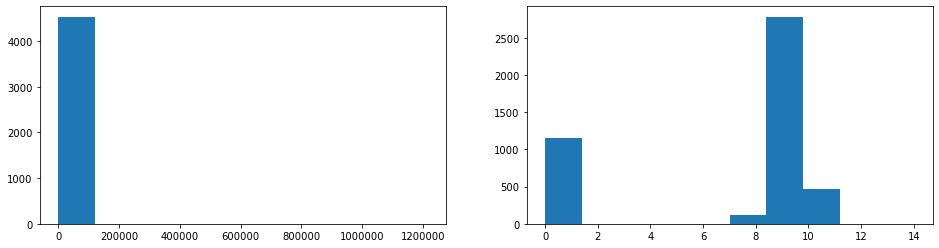

In [21]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(fullraw2["likes"])

fullraw2["likes_log"]=np.where(fullraw2["likes"]==0,0,np.log(fullraw2["likes"]))
plt.subplot(1,2,2)
plt.hist(fullraw2["likes_log"])
fullraw2.drop(["likes"], axis=1, inplace=True)

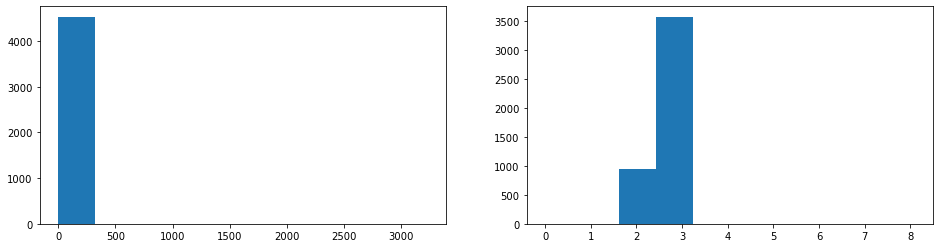

In [22]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(fullraw2["Tag_count"])
fullraw2["Tag_count_log"]=np.where(fullraw2["Tag_count"]==0,0,np.log(fullraw2["Tag_count"]))

plt.subplot(1,2,2)
plt.hist(fullraw2["Tag_count_log"])

fullraw2.drop(["Tag_count"], axis=1, inplace=True)

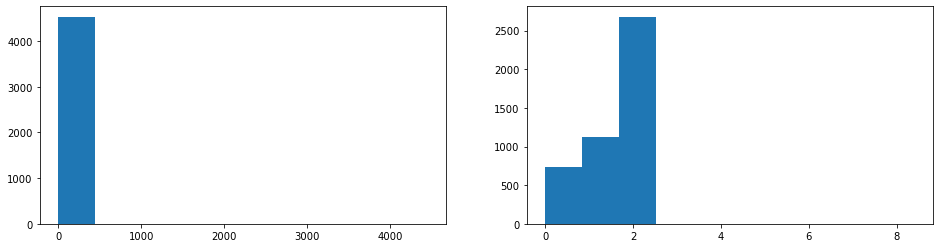

In [23]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(fullraw2["Trend_day_count"])

fullraw2["Trend_day_count_log"]=np.where(fullraw2["Trend_day_count"]==0,0,np.log(fullraw2["Trend_day_count"]))

plt.subplot(1,2,2)
plt.hist(fullraw2["Trend_day_count_log"])

fullraw2.drop(["Trend_day_count"], axis=1, inplace=True)

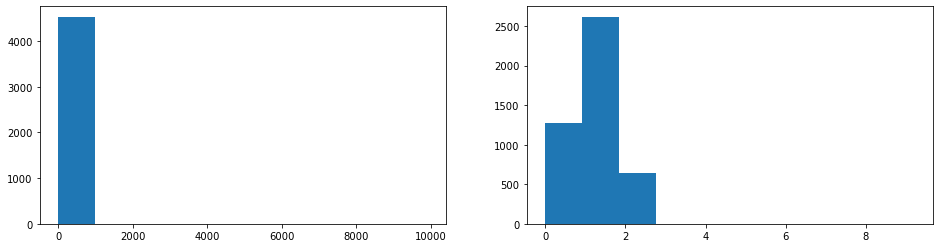

In [24]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(fullraw2["Trend_tag_count"])
fullraw2["Trend_tag_count_log"]=np.where(fullraw2["Trend_tag_count"]==0,0,np.log(fullraw2["Trend_tag_count"]))

plt.subplot(1,2,2)
plt.hist(fullraw2["Trend_tag_count_log"])
fullraw2.drop(["Trend_tag_count"], axis=1, inplace=True)

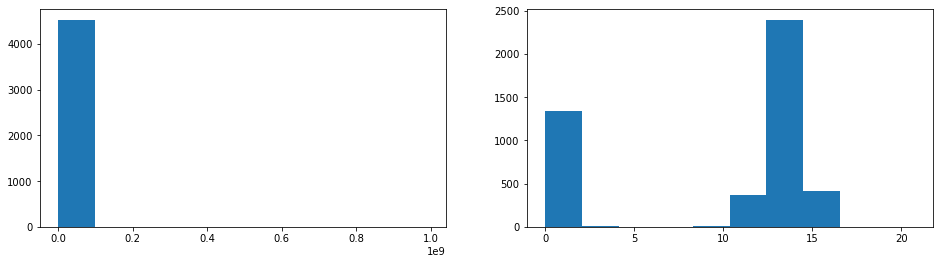

In [25]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.hist(fullraw2["views"])

fullraw2["views_log"]=np.where(fullraw2["views"]==0,0,np.log(fullraw2["views"]))

plt.subplot(1,2,2)
plt.hist(fullraw2["views_log"])
fullraw2.drop(["views"], axis=1, inplace=True)

(array([1266.,  355.,  378.,  400.,  357.,  360.,  357.,  354.,  404.,
         302.]),
 array([    0. ,  1491.6,  2983.2,  4474.8,  5966.4,  7458. ,  8949.6,
        10441.2, 11932.8, 13424.4, 14916. ]),
 <a list of 10 Patch objects>)

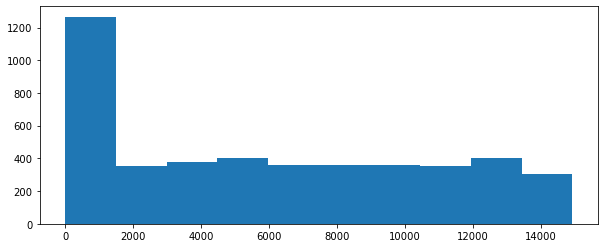

In [28]:
plt.figure(figsize=(10,4))
plt.hist(fullraw2["dislike"])

(array([  61.,  330.,  323.,  361.,  322., 1781.,  302.,  323.,  350.,
         380.]),
 array([1.000000e+01, 2.999670e+04, 5.998340e+04, 8.997010e+04,
        1.199568e+05, 1.499435e+05, 1.799302e+05, 2.099169e+05,
        2.399036e+05, 2.698903e+05, 2.998770e+05]),
 <a list of 10 Patch objects>)

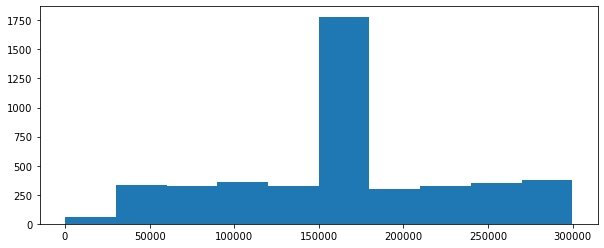

In [29]:
plt.figure(figsize=(10,4))
plt.hist(fullraw2["comment_count"])

### Train and Test split

In [31]:
#train test split
Train1=fullraw2[fullraw2["Source_Train"]==1].drop(["Source_Train"], axis=1).copy()
FinalTest=fullraw2[fullraw2["Source_Train"]==0].drop(["Source_Train"], axis=1).copy()

In [32]:
features=[x for x in Train1.columns if x!="views_log"]
dep=Train1["views_log"]
TrainX, TestX, TrainY, TestY=train_test_split(Train1[features], dep, train_size=0.70, random_state=123)

### Model building

First we will create a baseline model using default parameters and then we will fine tune the model using **Gridsearch**

In [64]:
mt=RandomForestRegressor(random_state=4, n_jobs=-2).fit(TrainX, TrainY)
Test_pred=mt.predict(TestX)
Test_pred=np.exp(Test_pred)

In [65]:
#RMSE for Random Forest
RF_RMSE1=np.sqrt(np.mean((TestY-Test_pred)**2))
RF_RMSE1

1469860.9469680197

### GridSearchCV

Grid search with cross validation is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. 

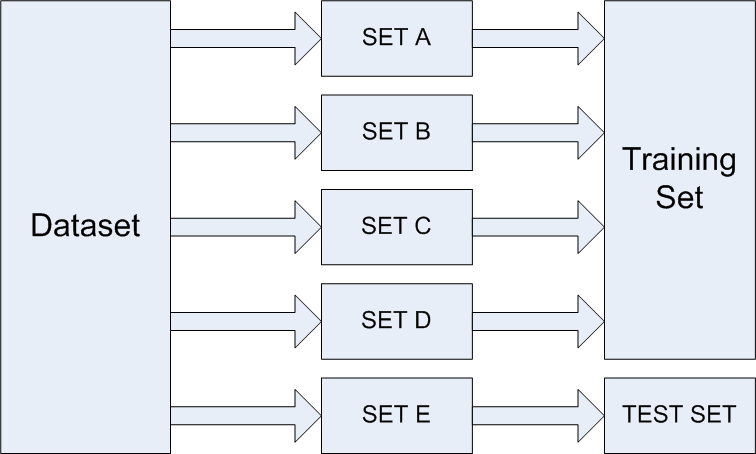



In [53]:
parameters={'max_features': ['auto', 'sqrt'], 'min_samples_leaf': range(2,10,1), 'min_samples_split': range(2,16,2), 'n_estimators': range(250,600,50)}
Grid=GridSearchCV(estimator=RandomForestRegressor(random_state=123), param_grid=parameters,scoring="neg_mean_absolute_error", cv=3, n_jobs=-2, verbose=7, pre_dispatch="2*n_jobs").fit(TrainX, TrainY)
Griddf=pd.DataFrame.from_dict(Grid.cv_results_)
Griddf.to_csv("Griddf.csv", index=False)

Fitting 3 folds for each of 784 candidates, totalling 2352 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-2)]: Done 122 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-2)]: Done 282 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-2)]: Done 386 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-2)]: Done 506 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed: 54.1min
[Parallel(n_jobs=-2)]: Done 962 tasks      | elapsed: 65.1min
[Parallel(n_jobs=-2)]: Done 1146 tasks      | elapsed: 76.1min
[Parallel(n_jobs=-2)]: Done 1346 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-2)]: Done 1562 tasks      | elapsed: 80.4min
[Parallel(n_jobs=-2)]: Done 1794 tasks      | elapsed

In [62]:
Bestparm=Grid.best_params_
Bestparm

{'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 450}

#### Rebuidling Random Forest based on the parameters found by hyperparameters search

In [67]:
mtR=RandomForestRegressor(random_state=4, max_features='auto', min_samples_leaf=6, min_samples_split=2, n_estimators=450, n_jobs=-2).fit(TrainX, TrainY)
Test_pred=mt.predict(TestX)
Test_pred=np.exp(Test_pred)
RF_RMSE2=np.sqrt(np.mean((TestY-Test_pred)**2))
RF_RMSE2

1469860.9469680204

### GridSeach CV for KNearest Neighbour 

#### for Stacking Regressor

In [71]:
parameters={'n_neighbors':[1,3,5,7,9], 'p':[1,2], 'weights':['uniform', 'distance'], 'leaf_size':range(5,55,5)}
Grid=GridSearchCV(estimator=KNeighborsRegressor(algorithm='auto', n_jobs=-2), param_grid=parameters,scoring="neg_mean_absolute_error", cv=5,n_jobs=-2, verbose=7, pre_dispatch=6).fit(TrainX, TrainY)
Griddf=pd.DataFrame.from_dict(Grid.cv_results_)
Griddf.to_csv("Griddf.csv", index=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-2)]: Done  26 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-2)]: Done 122 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 282 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-2)]: Done 386 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-2)]: Done 506 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-2)]: Done 962 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:  6.4min finished


In [72]:
Bestparm=Grid.best_params_
Bestparm

{'leaf_size': 5, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

### Stacking Regressor

**KNN, LR, Random Forest, and RidgeCV**

Ridge CV to add a **regularised model**, 
KNN for clustered nearest grouping
LR for bias

In [73]:
estimators = [('lr',LinearRegression()), 
              ('RF', RandomForestRegressor(random_state=4, max_features='auto', min_samples_leaf=6, min_samples_split=2, n_estimators=450)), 
              ('KNN', KNeighborsRegressor(n_neighbors=5, leaf_size=5, p=1, weights='uniform')), 
              ('rv', RidgeCV())]

In [74]:
ms=StackingRegressor(estimators=estimators, final_estimator=KNeighborsRegressor(n_neighbors=7, weights='distance')).fit(TrainX, TrainY)
Test_predS=ms.predict(TestX)
Test_predS=np.exp(Test_predS)
SR_RMSE=np.sqrt(np.mean((TestY-Test_predS)**2))
SR_RMSE

497335.27826285176

In [76]:
print("Improvement:",RF_RMSE2-SR_RMSE)

Improvement: 972525.6687051686
